In [2]:
!pip install requests pandas nltk transformers
from google.colab import output
output.enable_custom_widget_manager()
from google.colab import widgets

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [7]:
import requests
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from nltk import pos_tag
from nltk.stem import PorterStemmer

In [8]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import time

In [9]:
import pandas as pd

with open('events.txt', 'r', encoding='utf-8') as file:
    content = file.read()

print("File Content:")
print(content)

File Content:

1. Join us for the **Tech Conference 2023** on **May 10, 2023**, in **San Francisco, CA**, where experts discuss the future of AI.
2. Don't miss the **Music Festival** happening on **June 15, 2023**, in **New Orleans, LA**, featuring a lineup of popular bands.
3. Visit the **Art Exhibition** opening on **July 20, 2023**, in **New York, NY**, to explore works by contemporary artists.
4. Participate in the annual **Charity Run** on **August 5, 2023**, in **Chicago, IL**, to support local charities.
5. Taste the best of local cuisine at the **Food Fair** on **September 12, 2023**, in **Austin, TX**.
6. Attend the **Annual Book Fair** on **October 1, 2023**, in **Los Angeles, CA**, celebrating literature and authors.
7. Experience the **Winter Wonderland Festival** on **December 1, 2023**, in **Denver, CO**, filled with holiday cheer.
8. Join the **Global Startup Summit** on **November 10, 2023**, in **Singapore**, showcasing innovative entrepreneurs.
9. Celebrate the **Summ

In [10]:
# Split the content into lines
lines = content.split('\n')

# Create a DataFrame from the lines
df = pd.DataFrame(lines, columns=['text'])

# Initialize stop words and stemmer for English
stop_words_en = set(stopwords.words('english'))
stemmer_en = PorterStemmer()

# Preprocess text
def preprocess(text):
    # Normalization: Convert to lowercase
    text = text.lower()
    # Remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words_en]

    return ' '.join(tokens)

# Apply preprocessing to the text
df['text'] = df['text'].apply(preprocess)
print(df['text'].head(10))

0                                                     
1    1 join us tech conference 2023 may 10 2023 san...
2    2 dont miss music festival happening june 15 2...
3    3 visit art exhibition opening july 20 2023 ne...
4    4 participate annual charity run august 5 2023...
5    5 taste best local cuisine food fair september...
6    6 attend annual book fair october 1 2023 los a...
7    7 experience winter wonderland festival decemb...
8    8 join global startup summit november 10 2023 ...
9    9 celebrate summer solstice june 21 2023 stone...
Name: text, dtype: object


In [11]:
import spacy
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [12]:
# Function for Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = {ent.label_: ent.text for ent in doc.ents}
    return entities

# Apply NER to the DataFrame
df['entities'] = df['text'].apply(extract_entities)

# Part-of-Speech (POS) Tagging
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

# Apply POS tagging to the DataFrame
df['pos_tags'] = df['text'].apply(pos_tagging)

# Display the DataFrame with extracted features
print("DataFrame with Extracted Features:")
print(df[['text']])
print(df[['entities']])
print(df[['pos_tags']])

DataFrame with Extracted Features:
                                                  text
0                                                     
1    1 join us tech conference 2023 may 10 2023 san...
2    2 dont miss music festival happening june 15 2...
3    3 visit art exhibition opening july 20 2023 ne...
4    4 participate annual charity run august 5 2023...
..                                                 ...
133  133 experience annual kite festival june 1 202...
134  134 attend local arts festival november 5 2023...
135  135 join community sports tournament september...
136  136 celebrate national volunteer week communit...
137                                                   

[138 rows x 1 columns]
                                              entities
0                                                   {}
1    {'CARDINAL': '1', 'DATE': '2023 may 10 2023', ...
2            {'CARDINAL': '2', 'DATE': 'june 15 2023'}
3    {'CARDINAL': '3', 'DATE': 'july 20 2023', 'GPE...
4    {

In [13]:
def extract_relationships(text):
    doc = nlp(text)
    relationships = []
    for token in doc:
        if token.dep_ == 'nsubj':
            relationships.append((token.text, token.head.text))
    return relationships

df['relationships'] = df['text'].apply(extract_relationships)

In [14]:
from textblob import TextBlob

def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['text'].apply(sentiment_analysis)
print(df['sentiment'])

0      0.000000
1      0.000000
2      0.368182
3      0.151515
4      0.000000
         ...   
133    0.000000
134    0.000000
135    0.000000
136    0.000000
137    0.000000
Name: sentiment, Length: 138, dtype: float64


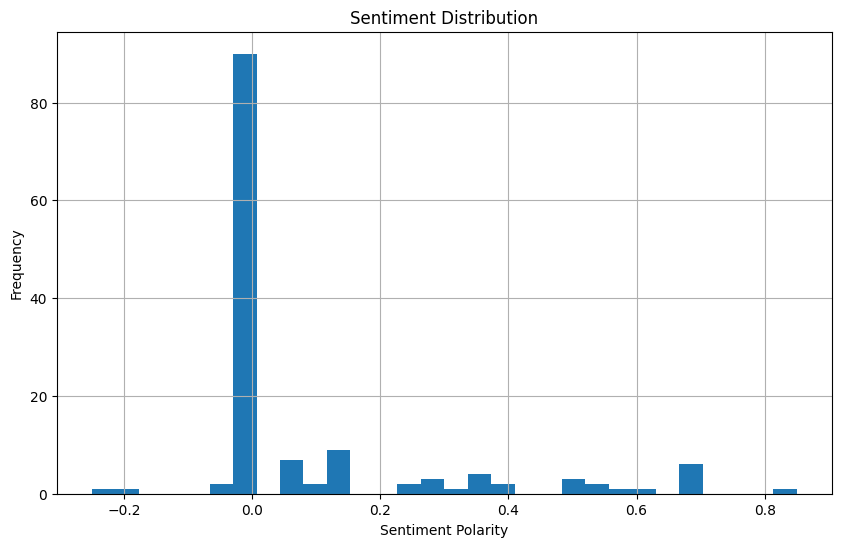

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.to_csv('enriched_data.csv', index=False)

In [17]:
df

,text,entities,pos_tags,relationships,sentiment
0,,{},[],[],0.000000
1,1 join us tech conference 2023 may 10 2023 san...,"{'CARDINAL': '1', 'DATE': '2023 may 10 2023', ...","[(1, X), (join, VERB), (us, PROPN), (tech, PRO...","[(francisco, ca), (experts, discuss)]",0.000000
2,2 dont miss music festival happening june 15 2...,"{'CARDINAL': '2', 'DATE': 'june 15 2023'}","[(2, X), (do, AUX), (nt, PART), (miss, VERB), ...","[(2, miss), (la, featuring)]",0.368182
3,3 visit art exhibition opening july 20 2023 ne...,"{'CARDINAL': '3', 'DATE': 'july 20 2023', 'GPE...","[(3, NUM), (visit, NOUN), (art, NOUN), (exhibi...","[(opening, explore), (explore, works)]",0.151515
4,4 participate annual charity run august 5 2023...,"{'CARDINAL': '4', 'DATE': 'august 5 2023', 'GP...","[(4, NUM), (participate, VERB), (annual, ADJ),...","[(run, support), (il, support)]",0.000000
...,...,...,...,...,...
133,133 experience annual kite festival june 1 202...,"{'CARDINAL': '133', 'DATE': 'june 1 2023'}","[(133, NUM), (experience, NOUN), (annual, ADJ)...","[(festival, ca)]",0.000000
134,134 attend local arts festival november 5 2023...,"{'CARDINAL': '134', 'DATE': 'november 5 2023 c...","[(134, NUM), (attend, VERB), (local, ADJ), (ar...","[(134, attend)]",0.000000
135,135 join community sports tournament september...,"{'CARDINAL': '135', 'DATE': 'september', 'ORG'...","[(135, NUM), (join, VERB), (community, NOUN), ...",[],0.000000
136,136 celebrate national volunteer week communit...,"{'CARDINAL': '136', 'DATE': 'april 1622 2023'}","[(136, NUM), (celebrate, VERB), (national, ADJ...",[],0.000000


In [18]:
def extract_event_info(text):
    # Extract event name pattern (improved to catch more event names)
    event_pattern = r'(?:at |the |for )?([^,]+?)(?=\s+(?:on|from)\s+\w+\s+\d{1,2})'

    # Date patterns
    date_pattern = r'(?:on |from )(\w+ \d{1,2}(?:-\d{1,2})?, \d{4})'

    # Location pattern
    location_pattern = r',\s+in\s+([^,]+(?:, [A-Z]{2})?)'

    # Extract information
    event_match = re.search(event_pattern, text)
    date_match = re.search(date_pattern, text)
    location_match = re.search(location_pattern, text)

    # Get matches or None
    event = event_match.group(1).strip() if event_match else None
    date = date_match.group(1) if date_match else None
    location = location_match.group(1) if location_match else None

    # Convert date to datetime if found
    if date:
        try:
            # Handle date ranges
            if '-' in date:
                date = date.split('-')[0].strip()
            date = pd.to_datetime(date)
        except:
            date = None

    return pd.Series({
        'event_name': event,
        'date': date,
        'location': location
    })

# Assuming 'content' from the earlier cell contains the raw text
events = [line.strip() for line in content.split('\n') if line.strip()]  # Use 'content' instead of 'text_content'
df = pd.DataFrame({'text': events})

# Extract information
df[['event_name', 'date', 'location']] = df['text'].apply(extract_event_info)

In [19]:
df

,text,event_name,date,location
0,1. Join us for the **Tech Conference 2023** on...,None,None,"**San Francisco, CA"
1,2. Don't miss the **Music Festival** happening...,None,None,"**New Orleans, LA"
2,3. Visit the **Art Exhibition** opening on **J...,None,None,"**New York, NY"
3,4. Participate in the annual **Charity Run** o...,None,None,"**Chicago, IL"
4,5. Taste the best of local cuisine at the **Fo...,None,None,"**Austin, TX"
...,...,...,...,...
131,132. Celebrate **National Teacher Day** on **M...,None,None,None
132,133. Experience the **Annual Kite Festival** o...,None,None,"**San Diego, CA"
133,134. Attend the **Local Arts Festival** on **N...,None,None,"**Chicago, IL"
134,135. Join the **Community Sports Tournament** ...,None,None,"**Atlanta, GA"


In [20]:
def preprocess_data(self, df):
        # Create month and year features
        df['month'] = df['date'].dt.month
        df['year'] = df['date'].dt.year
        df['day_of_week'] = df['date'].dt.dayofweek

        # Extract city and state/country
        df[['city', 'state']] = df['location'].str.extract(r'(.*?)(?:,\s*([A-Z]{2}|[A-Za-z]+))?$')

        # Create event type feature
        df['event_type'] = df['event_name'].apply(self._categorize_event)

        return df

In [21]:
df

,text,event_name,date,location
0,1. Join us for the **Tech Conference 2023** on...,None,None,"**San Francisco, CA"
1,2. Don't miss the **Music Festival** happening...,None,None,"**New Orleans, LA"
2,3. Visit the **Art Exhibition** opening on **J...,None,None,"**New York, NY"
3,4. Participate in the annual **Charity Run** o...,None,None,"**Chicago, IL"
4,5. Taste the best of local cuisine at the **Fo...,None,None,"**Austin, TX"
...,...,...,...,...
131,132. Celebrate **National Teacher Day** on **M...,None,None,None
132,133. Experience the **Annual Kite Festival** o...,None,None,"**San Diego, CA"
133,134. Attend the **Local Arts Festival** on **N...,None,None,"**Chicago, IL"
134,135. Join the **Community Sports Tournament** ...,None,None,"**Atlanta, GA"


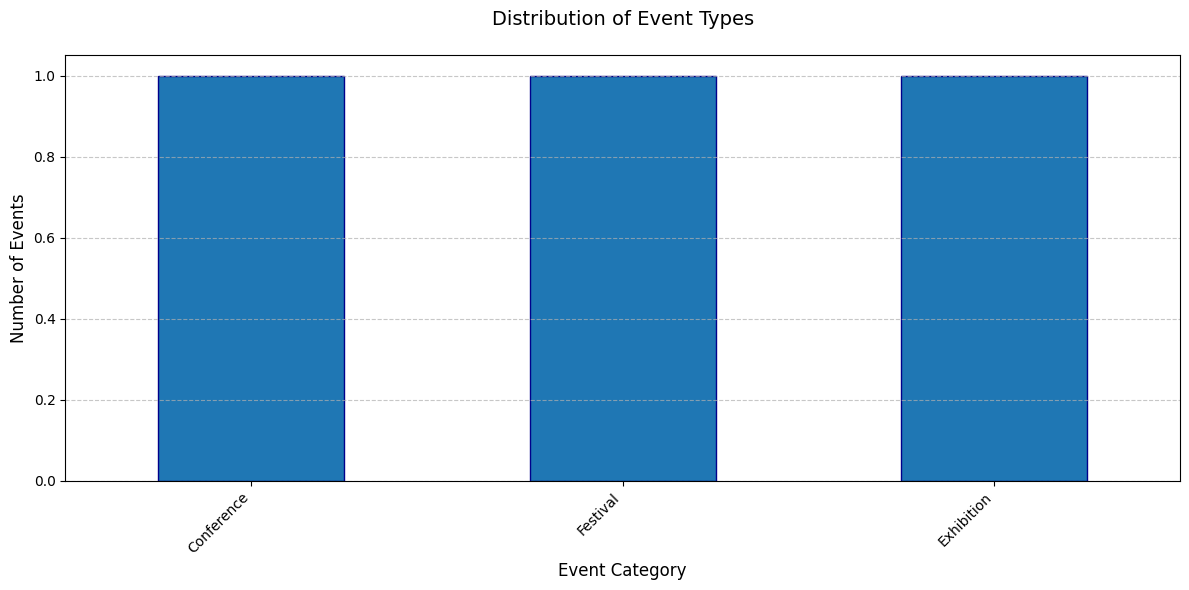

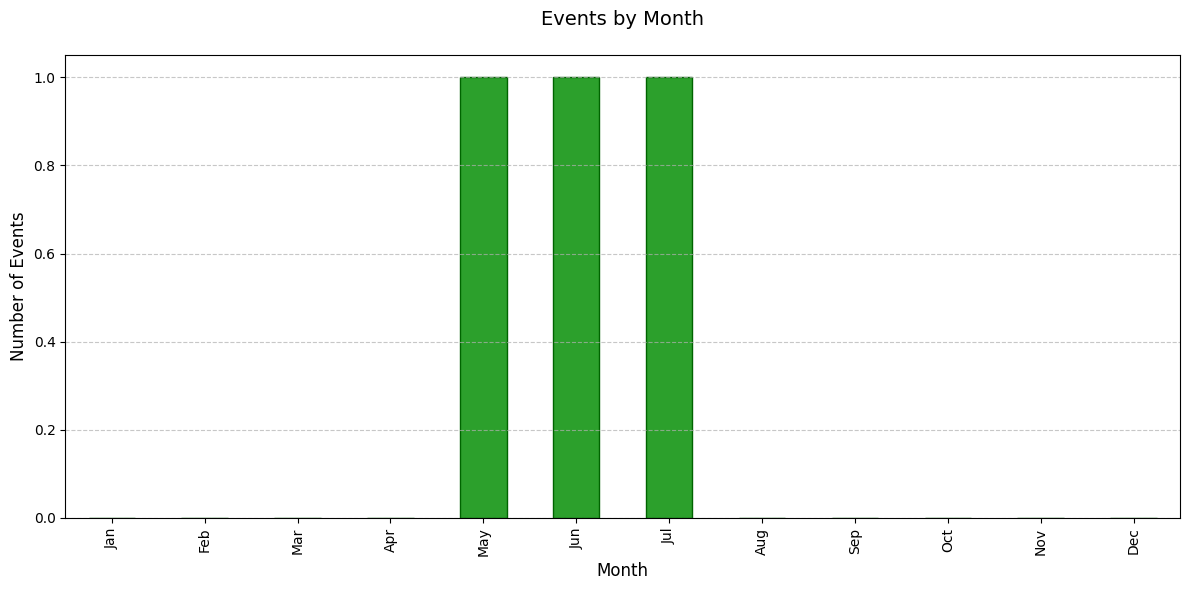


Event Data Summary:
Total events: 3
Date range: 2023-05-10 to 2023-07-20

Top Event Types:
event_type
Conference    1
Festival      1
Exhibition    1
Name: count, dtype: int64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Optional

def process_event_data(df: pd.DataFrame) -> Optional[pd.DataFrame]:
    """
    Process event data with comprehensive error handling and validation

    Args:
        df: Input DataFrame with raw event data

    Returns:
        Processed DataFrame or None if processing fails
    """
    try:
        # Validate input DataFrame
        required_columns = {'date', 'event_name', 'location'}
        missing_cols = required_columns - set(df.columns)
        if missing_cols:
            print(f"Missing required columns: {missing_cols}")
            return None

        # Convert dates with multiple attempts
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

        # Check if we have any valid dates
        if df['date'].isna().all():
            print("Warning: No valid dates found in date column")
            return None

        # Create temporal features only for valid dates
        valid_dates = df['date'].notna()
        df.loc[valid_dates, 'month'] = df.loc[valid_dates, 'date'].dt.month
        df.loc[valid_dates, 'year'] = df.loc[valid_dates, 'date'].dt.year
        df.loc[valid_dates, 'day_of_week'] = df.loc[valid_dates, 'date'].dt.dayofweek

        # Categorize events
        def categorize_event(event_name):
            """Enhanced event categorization with more keywords"""
            if not isinstance(event_name, str):
                return 'Other'

            event_name = event_name.lower()
            categories = {
                'Conference': ['conference', 'summit', 'symposium', 'forum'],
                'Festival': ['festival', 'fair', 'show', 'concert'],
                'Exhibition': ['exhibition', 'expo', 'gallery', 'display'],
                'Sports': ['run', 'marathon', 'race', 'tournament'],
                'Workshop': ['workshop', 'seminar', 'class', 'bootcamp'],
                'Market': ['market', 'bazaar', 'sale', 'flea']
            }

            for cat, keywords in categories.items():
                if any(keyword in event_name for keyword in keywords):
                    return cat
            return 'Other'

        df['event_type'] = df['event_name'].apply(categorize_event)

        # Extract location components
        loc_split = df['location'].str.extract(r'(.*?)(?:,\s*([A-Z]{2}|[A-Za-z\s]+))?$')
        df['city'] = loc_split[0].str.strip().fillna('Unknown')
        df['state'] = loc_split[1].str.strip().fillna('Unknown')

        return df

    except Exception as e:
        print(f"Error processing data: {str(e)}")
        return None

def visualize_event_data(df: pd.DataFrame) -> None:
    """
    Create professional visualizations of event data

    Args:
        df: Processed DataFrame from process_event_data()
    """
    try:
        # Event Type Distribution
        plt.figure(figsize=(12, 6))
        event_counts = df['event_type'].value_counts()
        if not event_counts.empty:
            event_counts.plot(kind='bar', color='#1f77b4', edgecolor='darkblue')
            plt.title('Distribution of Event Types\n', fontsize=14)
            plt.xlabel('Event Category', fontsize=12)
            plt.ylabel('Number of Events', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print("No event type data to visualize")

        # Events by Month (only if we have month data)
        if 'month' in df.columns and not df['month'].isna().all():
            plt.figure(figsize=(12, 6))
            month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

            # Get counts for all months (1-12), filling missing months with 0
            monthly_counts = df['month'].value_counts().reindex(range(1,13), fill_value=0)
            monthly_counts.index = month_names

            monthly_counts.plot(kind='bar', color='#2ca02c', edgecolor='darkgreen')
            plt.title('Events by Month\n', fontsize=14)
            plt.xlabel('Month', fontsize=12)
            plt.ylabel('Number of Events', fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print("No valid month data to visualize")

        # Print summary stats
        print("\nEvent Data Summary:")
        print(f"Total events: {len(df)}")
        if 'date' in df.columns:
            valid_dates = df['date'].notna()
            if valid_dates.any():
                print(f"Date range: {df.loc[valid_dates, 'date'].min().date()} to "
                     f"{df.loc[valid_dates, 'date'].max().date()}")
        print("\nTop Event Types:")
        if 'event_type' in df.columns:
            print(df['event_type'].value_counts().head())

    except Exception as e:
        print(f"Error creating visualizations: {str(e)}")

# Example usage
if __name__ == "__main__":

    # Sample data for demonstration
    sample_data = {
        'date': ['May 10, 2023', 'June 15, 2023', 'July 20, 2023'],
        'event_name': ['Tech Conference', 'Music Festival', 'Art Exhibition'],
        'location': ['San Francisco, CA', 'New Orleans, LA', 'New York, NY']
    }
    df = pd.DataFrame(sample_data)

    # Process and visualize
    processed_df = process_event_data(df)
    if processed_df is not None:
        visualize_event_data(processed_df)
    else:
        print("Data processing failed - check your input data")

In [27]:
# Prepare data for modeling
# Encode categorical variables
le_city = LabelEncoder()
le_state = LabelEncoder()
le_event_type = LabelEncoder()

df['city_encoded'] = le_city.fit_transform(df['city'].fillna('Unknown'))
df['state_encoded'] = le_state.fit_transform(df['state'].fillna('Unknown'))
df['event_type_encoded'] = le_event_type.fit_transform(df['event_type'])


In [28]:
# Prepare features
feature_cols = ['month', 'year', 'day_of_week', 'city_encoded', 'state_encoded']
X = df[feature_cols].values
y = df['event_type_encoded']

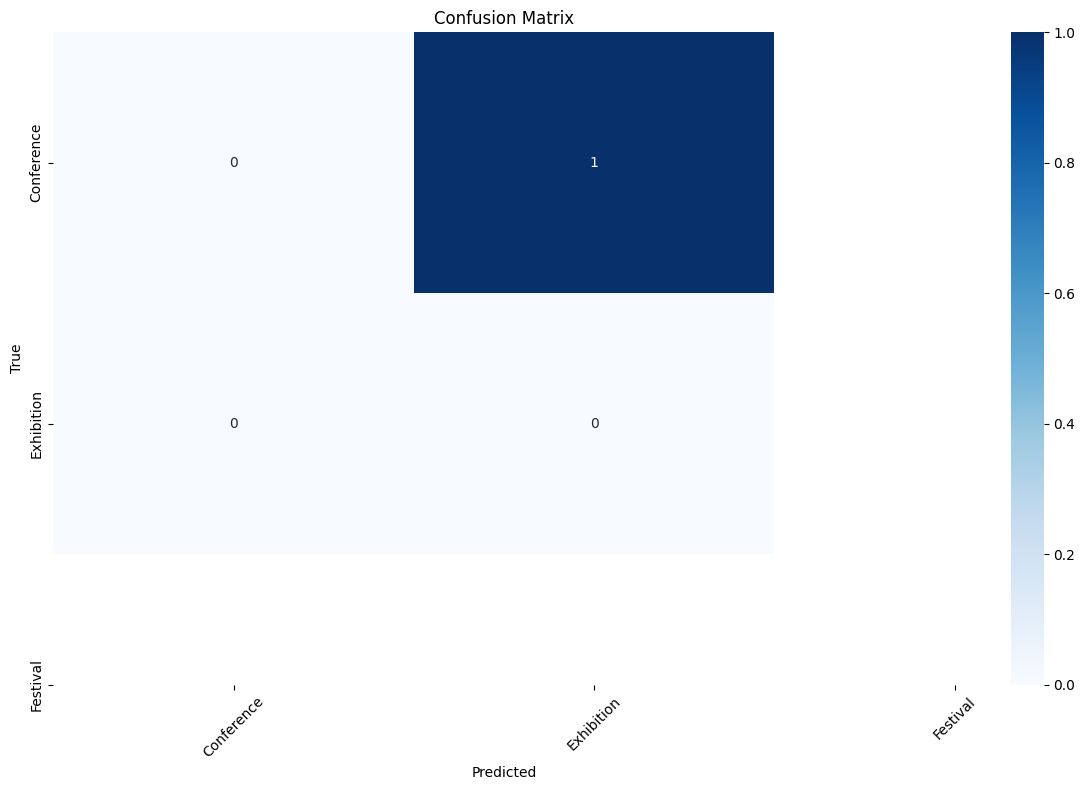

In [31]:
# Plot confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_event_type.classes_,
            yticklabels=le_event_type.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

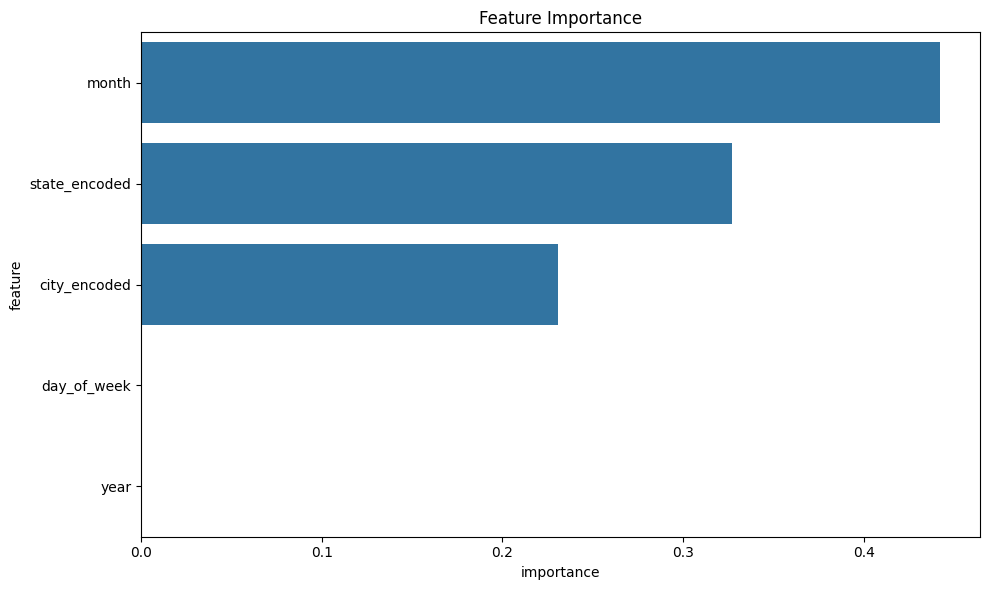

In [32]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [33]:
!pip install geonamescache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 14.9 MB/s eta 0:00:00


In [34]:
def predict_event_details(text):
    # Improved versatile patterns
    event_pattern = r'^(.*?)(?=\s+(?:on|at|in|from)|$)'

    # Enhanced date pattern to catch various formats including those with commas
    date_pattern = r'(?:on\s+)?(\d{1,2}(?:st|nd|rd|th)?\s*[,]?\s*(?:January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[,]?\s+\d{4})'

    # Enhanced location pattern to catch city, state/country format
    location_pattern = r'(?:in|at|,)\s+([^,]+(?:,\s*[A-Z]{2}|,\s*[A-Za-z\s]+)?)\s*$'

    # Import cities database (you can use geonamescache or a similar library)
    from geonamescache import GeonamesCache
    gc = GeonamesCache()
    cities = gc.get_cities()

    def validate_location(loc):
        if not loc:
            return None
        # Clean the location string
        loc_parts = loc.strip().split(',')
        city = loc_parts[0].strip()
        state = loc_parts[1].strip() if len(loc_parts) > 1 else None

        # Check if it's a valid city
        for city_data in cities.values():
            if city.lower() == city_data['name'].lower():
                return f"{city_data['name']}, {city_data['countryCode']}"

        # If not found, return original but mark as unverified
        return loc + " (Unverified)"

    # Extract event name
    event_match = re.search(event_pattern, text, re.IGNORECASE)
    event_name = event_match.group(1).strip() if event_match else None

    # Extract and validate date
    date_match = re.search(date_pattern, text, re.IGNORECASE)
    event_date = date_match.group(1) if date_match else None
    if event_date:
        try:
            # Handle multiple date formats
            date_text = re.sub(r'(?:st|nd|rd|th)', '', event_date)  # Remove ordinal indicators
            parsed_date = pd.to_datetime(date_text)
            event_date = parsed_date.strftime('%B %d, %Y')  # Format: March 10, 2021
        except:
            event_date = None

    # Extract and validate location
    location_match = re.search(location_pattern, text, re.IGNORECASE)
    location = location_match.group(1).strip() if location_match else None
    if location:
        location = validate_location(location)

    return event_name, event_date, location

In [35]:
test_event = "Tech Gala on 5 December 2023 at Bahria University"
category, date, location = predict_event_details(test_event)
print(f"Category: {category}")
print(f"Date: {date}")
print(f"Location: {location}")

Category: Tech Gala
Date: December 05, 2023
Location: Bahria University (Unverified)


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pickle
model_path = '/content/drive/MyDrive/event_classifier_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump({
        'model': rf_model,
        'le_city': le_city,
        'le_state': le_state,
        'le_event_type': le_event_type
    }, f)

print("\nModel saved to Google Drive!")


Model saved to Google Drive!


In [38]:
model_path = '/content/drive/MyDrive/event_classifier_model.pkl'

with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Access the loaded model components
rf_model = loaded_model['model']
le_city = loaded_model['le_city']
le_state = loaded_model['le_state']
le_event_type = loaded_model['le_event_type']

print("Model loaded successfully!")

Model loaded successfully!


In [39]:
!pip install ipywidgets
from IPython.display import HTML, display
import ipywidgets as widgets
from IPython.display import clear_output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


In [40]:
def create_animated_event_predictor():
    # Enhanced CSS with animations and better styling
    display(HTML("""
    <style>
        @keyframes fadeInDown {
            from {
                opacity: 0;
                transform: translateY(-20px);
            }
            to {
                opacity: 1;
                transform: translateY(0);
            }
        }

        @keyframes pulseBox {
            0% { transform: scale(1); }
            50% { transform: scale(1.02); }
            100% { transform: scale(1); }
        }

        @keyframes gradientBG {
            0% { background-position: 0% 50%; }
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%; }
        }

        .main-container {
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            padding: 20px;
            max-width: 900px;
            margin: 20px auto;
            background: linear-gradient(120deg, #f6f8f9, #ffffff, #f0f2f3);
            background-size: 200% 200%;
            animation: gradientBG 10s ease infinite;
            border-radius: 15px;
            box-shadow: 0 8px 32px rgba(0,0,0,0.1);
        }

        .title-box {
            background: linear-gradient(45deg, #2c3e50, #3498db, #2980b9);
            background-size: 200% 200%;
            animation: gradientBG 5s ease infinite;
            padding: 20px 40px;
            border-radius: 10px;
            margin-bottom: 30px;
            box-shadow: 0 4px 15px rgba(0,0,0,0.2);
            transform-origin: center;
            animation: fadeInDown 1s ease-out, pulseBox 3s infinite;
        }

        .main-title {
            color: white;
            font-size: 36px;
            font-weight: bold;
            text-align: center;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
            margin: 0;
            font-family: 'Arial', sans-serif;
        }

        .input-section {
            width: 100%;
            max-width: 700px;
            animation: fadeInDown 1s ease-out 0.3s backwards;
        }

        .prediction-result {
            background: white;
            border-left: 5px solid #3498db;
            padding: 15px;
            margin: 10px 0;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            animation: fadeInDown 0.5s ease-out;
            transition: transform 0.3s ease;
        }

        .prediction-result:hover {
            transform: translateX(10px);
        }

        .result-label {
            color: #7f8c8d;
            font-size: 14px;
            margin-bottom: 5px;
            font-weight: 500;
        }

        .result-value {
            color: #2c3e50;
            font-size: 16px;
            font-weight: bold;
        }

        .button-container {
            display: flex;
            gap: 15px;
            margin: 20px 0;
            animation: fadeInDown 1s ease-out 0.6s backwards;
        }
    </style>

    <div class="main-container">
        <div class="title-box">
            <h1 class="main-title">🎯 Event Predictor AI</h1>
        </div>
    """))

    # Create input widget
    input_text = widgets.Text(
        placeholder='E.g., "Tech Innovation Summit on December 15, 2024, in Austin, TX"',
        description='',
        layout=widgets.Layout(width='700px')
    )

    # Create buttons with icons
    predict_button = widgets.Button(
        description='Predict Event',
        button_style='primary',
        icon='magic',
        layout=widgets.Layout(width='200px')
    )

    clear_button = widgets.Button(
        description='Clear Input',
        button_style='warning',
        icon='trash',
        layout=widgets.Layout(width='200px')
    )

    output = widgets.Output()

    def on_predict_button_clicked(b):
        with output:
            clear_output()

            # Loading animation
            display(HTML("""
                <div style="text-align: center; margin: 20px;">
                    <div style="color: #3498db; font-size: 18px;">
                        Analyzing event details... 🔍
                    </div>
                </div>
            """))
            time.sleep(1)

            text = input_text.value
            predicted_category, predicted_date, predicted_location = predict_event_details(text)

            clear_output()
            display(HTML(f"""
            <div class="results-container">
                <div class="prediction-result">
                    <div class="result-label">📝 Input Event</div>
                    <div class="result-value">{text}</div>
                </div>

                <div class="prediction-result">
                    <div class="result-label">🏷️ Category</div>
                    <div class="result-value">{predicted_category}</div>
                </div>

                <div class="prediction-result">
                    <div class="result-label">📅 Date</div>
                    <div class="result-value">{predicted_date}</div>
                </div>

                <div class="prediction-result">
                    <div class="result-label">📍 Location</div>
                    <div class="result-value">{predicted_location}</div>
                </div>
            </div>
            """))

    def on_clear_button_clicked(b):
        input_text.value = ''
        with output:
            clear_output()

    predict_button.on_click(on_predict_button_clicked)
    clear_button.on_click(on_clear_button_clicked)

    # Display the rest of the UI
    display(HTML('<div class="input-section">'))
    display(input_text)
    display(HTML('</div>'))

    # Button container
    button_container = widgets.HBox([predict_button, clear_button])
    display(HTML('<div class="button-container">'))
    display(button_container)
    display(HTML('</div>'))

    display(output)
    display(HTML('</div>'))  # Close main-container

# Create the UI
create_animated_event_predictor()

Text(value='', layout=Layout(width='700px'), placeholder='E.g., "Tech Innovation Summit on December 15, 2024, …

Output()